In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as imd
np.random.seed(0)

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_datasets as tfds
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.datasets import fashion_mnist
import warnings


In [2]:
(train_image,train_label),(test_image,test_label) = fashion_mnist.load_data()


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
print(type(train_image))
print(type(train_label))
print(train_image.shape)
print(train_label.shape)
print(test_image.shape)
print(test_label.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


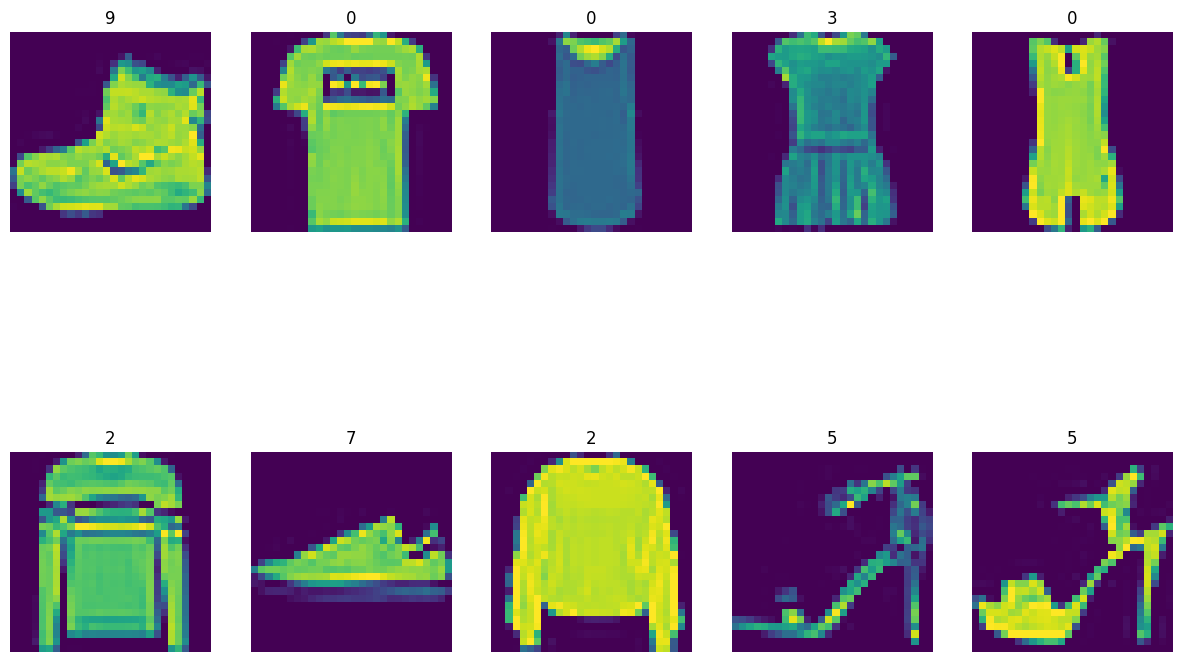

In [4]:
plt.figure(figsize=(15,10))
for i in range(10):
  plt.subplot(2,5,i+1)
  plt.imshow(train_image[i])
  plt.axis('off')
  plt.title(train_label[i])

In [5]:
train_image ,test_image = train_image /255.0,test_image / 255.0
train_images = train_image.reshape((train_image.shape[0], 28, 28, 1))
test_images = test_image.reshape((test_image.shape[0], 28, 28, 1))

In [6]:
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [7]:
model = Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Add Dense layers on top
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [10]:
history = model.fit(train_images, train_label, epochs=10,
                    validation_data=(test_images, test_label))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8351 - loss: 0.4482 - val_accuracy: 0.8693 - val_loss: 0.3696
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8824 - loss: 0.3238 - val_accuracy: 0.8819 - val_loss: 0.3265
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8993 - loss: 0.2742 - val_accuracy: 0.8910 - val_loss: 0.2970
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9123 - loss: 0.2401 - val_accuracy: 0.9013 - val_loss: 0.2712
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9203 - loss: 0.2156 - val_accuracy: 0.9037 - val_loss: 0.2651
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9286 - loss: 0.1925 - val_accuracy: 0.9020 - val_loss: 0.2746
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9344 - loss: 0.1782 - val_accuracy: 0.9120 - val_loss: 0.2453
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9386 - loss: 0.1583 -

In [11]:
model.save('model.h5')

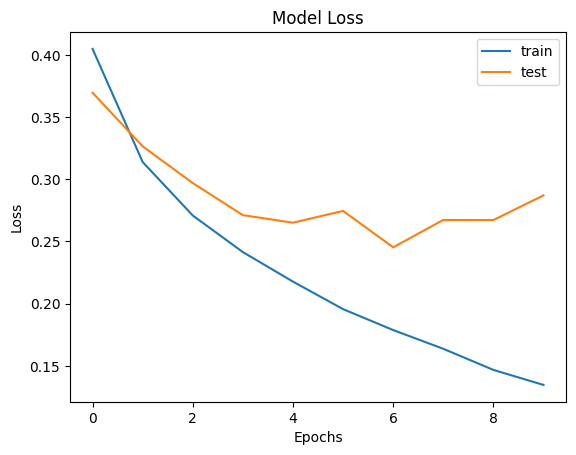

In [12]:
plt.plot(history.history['loss'],label='train_loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend(['train','test'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()


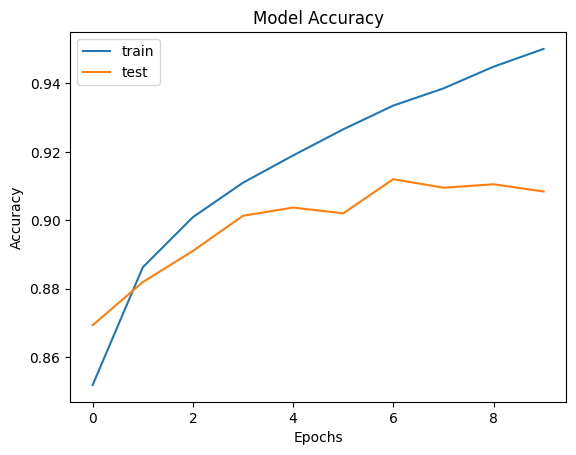

In [13]:
plt.plot(history.history['accuracy'],label='train_accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.legend(['train','test'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [14]:
accuracy,loss = model.evaluate(test_images,test_label)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9068 - loss: 0.2965


In [15]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
y_pred = model.predict(test_images)
y_pred = np.argmax(y_pred,axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [16]:
print('Accuracy = ',accuracy_score(test_label,y_pred))
print(confusion_matrix(test_label,y_pred ))
print(classification_report(test_label,y_pred ))

Accuracy =  0.9084
[[865   1  22  18   4   1  84   0   5   0]
 [  1 980   1  12   1   0   3   0   2   0]
 [ 12   0 882  10  34   0  60   0   2   0]
 [ 10   4  13 904  39   1  23   0   6   0]
 [  1   1  76  22 846   0  51   0   3   0]
 [  1   0   0   0   0 975   0  15   0   9]
 [114   2  69  21  57   0 723   0  14   0]
 [  0   0   0   0   0   8   0 962   0  30]
 [  4   0   4   3   3   2   4   2 976   2]
 [  1   0   0   0   0   6   0  22   0 971]]
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1000
           1       0.99      0.98      0.99      1000
           2       0.83      0.88      0.85      1000
           3       0.91      0.90      0.91      1000
           4       0.86      0.85      0.85      1000
           5       0.98      0.97      0.98      1000
           6       0.76      0.72      0.74      1000
           7       0.96      0.96      0.96      1000
           8       0.97      0.98      0.97      1000
         

In [23]:
from keras.models import load_model
my_model = load_model('model.h5')

from PIL import Image
import numpy as np

# Open the image
img = Image.open('/content/sample.png')

# Resize the image to 28x28 pixels
img = img.resize((28, 28))

# Convert the image to grayscale
img = img.convert('L')

# Convert the image to a numpy array and normalize it
img = np.array(img) / 255.0

img = img.reshape([1, 28, 28, 1])

# Make a prediction
prediction = model.predict(img)
print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
[[-4.3004246  -6.2791805  -6.4701285  -4.389168   -8.693062   -6.5545516
  -5.9711666   0.38525924 -2.3772044   2.1635644 ]]


In [24]:
np.argmax(prediction)

9

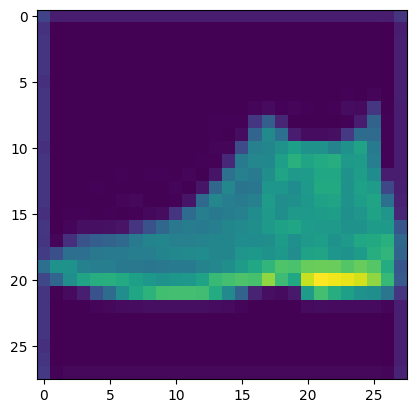

In [25]:
plt.imshow(img.reshape(28,28))

In [33]:
img_1 = test_images[9]
label_1 = test_label[9]
img_1 = img_1.reshape([1, 28, 28, 1])
print(label_1)

7


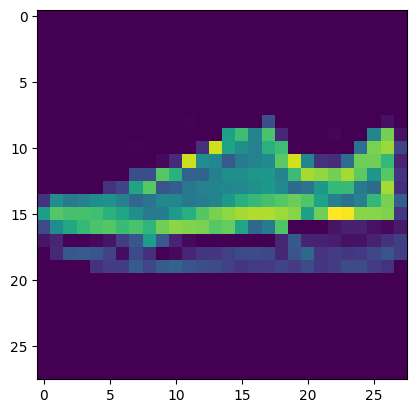

In [31]:
plt.imshow(img_1.reshape(28,28))

In [36]:
prediction = my_model.predict(img_1)
print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step
[[ -4.155897  -16.3035    -20.311281  -12.7725725 -14.711708   -0.9743316
  -14.491557   18.766947  -12.5559635  -1.3961971]]


In [39]:
predic = np.argmax(prediction)

In [42]:
class_names = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot"
]

data = []
for i, class_name in enumerate(class_names):
    this = (f" {i}: {class_name}")
    data.append(this)
print(data[predic][3:])

 Sneaker
